In [ ]:
import numpy as np
import pandas as pd
# кол-во признаков
N = 5

Цель:
Изучить методы отбора признаков для эффективного обучения моделей машинного обучения.
Описание задания:
В домашнем задании нужно решить задачу классификации точек наиболее эффективно. Для этого в работе необходимо применить различные методы по отбору признаков. Отбор признаков предпочтительнее осуществлять основываясь на математическом аппарате, поэтому данные для этого задания будут сгенерированы, чтобы избежать признаков с физическим смыслом.

1. Сгенерируйте данные с помощью кода:

In [ ]:
from sklearn.datasets import make_classification
x_data_generated, y_data_generated = make_classification(scale=1,random_state=750)
type(x_data_generated)

numpy.ndarray

In [ ]:
data = pd.DataFrame(x_data_generated)
data['target'] = y_data_generated
data.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,2.117118,-0.953670,-0.550942,2.605442,-0.210986,-0.260652,-1.057390,-0.883703,0.548213,0.867910,...,-0.539746,-0.395777,0.963158,-0.409221,1.944364,1.294126,0.986492,1.033223,0.964352,0
1,-0.470582,-0.226058,0.152884,1.618533,1.205192,-0.521985,-0.935500,-0.183050,0.452326,0.864218,...,0.491301,-1.099982,0.391690,-1.527381,0.646722,0.769142,-0.381003,1.456235,-0.062508,0
2,0.252580,-0.470148,-1.497106,-0.561606,1.033556,0.720260,0.741817,0.481862,-0.755754,1.009526,...,-2.755934,-0.336976,-2.041390,-0.907641,-1.213681,0.019388,1.069017,1.378363,-1.592493,0
3,-0.017348,-0.248999,1.082469,1.213401,0.172567,-0.313172,-0.640856,-0.672546,-0.031174,0.190074,...,-0.922806,-0.356920,0.584975,-0.531847,-1.376522,0.055924,0.706754,2.257702,-0.227026,0
4,1.048702,-1.098316,1.201678,-2.892738,-0.562207,2.409391,2.814545,1.027104,3.426299,0.689928,...,0.559523,-0.352338,-1.515076,0.804005,-0.800404,0.638310,-0.703389,-0.467009,-0.035865,1


In [ ]:
data['target'].value_counts()

1    51
0    49
Name: target, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['target']),data['target'],test_size=0.2, random_state=7)


2. Постройте модель логистической регрессии и оцените среднюю точность. Для этого используйте следующий код:
cross_val_score(LogisticRegression(), x, y, scoring='accuracy').mean()

In [ ]:
from sklearn.linear_model import LogisticRegression
table = {}
from sklearn.model_selection import cross_val_score
acc_no = cross_val_score(LogisticRegression(), x_data_generated, y_data_generated, scoring='accuracy').mean()
table['no'] = [x_data_generated.shape[1], acc_no]
print(table['no'])

[20, 0.64]


In [ ]:
df = X_train.copy()
df['target'] = y_train
df.head() #тестовый датафрейм с таргетом

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
50,1.407302,-2.036081,-0.283074,-1.756102,0.566762,2.808418,2.750036,-0.331094,0.254693,-0.171040,...,0.166164,1.807717,0.163074,0.427090,-0.421173,1.197764,0.445025,0.537430,-0.221682,0
2,0.252580,-0.470148,-1.497106,-0.561606,1.033556,0.720260,0.741817,0.481862,-0.755754,1.009526,...,-2.755934,-0.336976,-2.041390,-0.907641,-1.213681,0.019388,1.069017,1.378363,-1.592493,0
17,0.446154,1.230990,0.206200,-0.795176,1.589393,-0.844195,-0.392126,1.103994,-0.484210,1.213760,...,-0.326499,0.548792,1.063770,0.688241,0.921791,-0.501685,0.815420,0.194200,0.402496,1
85,-0.067917,-0.048791,-0.587793,-1.949153,-0.827688,0.944110,1.370744,0.390188,-0.743743,0.843439,...,-0.045499,1.912165,-0.616262,-0.752104,-0.227536,-0.220613,-0.263432,0.995758,0.057364,1
5,0.438969,0.523022,1.303411,1.149651,-0.089101,-1.042588,-1.184377,-2.585567,0.409888,0.828998,...,0.415954,0.609166,-0.677771,-0.540522,-0.264642,-0.012904,-3.095471,0.213306,2.209296,0


3. Используйте статистические методы для отбора признаков:
a) Выберите признаки на основе матрицы корреляции.
b) Отсеките низковариативные признаки (VarianceThreshold).
c) Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.

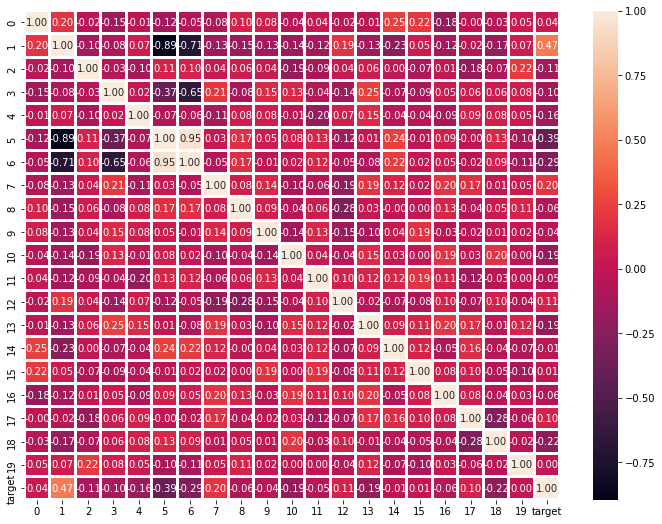

In [ ]:
# a - на основе матрицы корреляции +
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr,annot=True, fmt='.2f', linewidths = 2)
plt.show()
#  оствлю N признаков, которые  больше всего коррелируют с таргетом 
# col_cor = [18,11,7,3,6]
# col_cor = [3,16,18,13,12]
col_cor = [1,5, 6, 18,7]

In [ ]:
# b - низковариативные признаки +
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold() #n_features_in_=N
selector.fit(X_train,y_train)
x_VarianceThreshold = selector.fit_transform(X_test)

In [ ]:
# c
acc_kor = cross_val_score(LogisticRegression(), X_test[col_cor], y_test, scoring='accuracy').mean()
table['korr'] = [len(col_cor), acc_kor]

acc_variance = cross_val_score(LogisticRegression(), x_VarianceThreshold, y_test, scoring='accuracy').mean()
table['variance'] = [x_VarianceThreshold.shape[1],acc_variance]


4. Осуществите отбор признаков на основе дисперсионного анализа:
a) Выберите 5 лучших признаков с помощью скоринговой функции для классификации f_classif (SelectKBest(f_classif, k=5)).
b) Повторите п. 2 на отобранных признаках.

In [ ]:
# a -
from sklearn.feature_selection import SelectKBest, f_classif
select_best = SelectKBest(f_classif, k=N)
select_best.fit(X_train, y_train)
X_best = select_best.transform(X_test)
acc_best = cross_val_score(LogisticRegression(), X_best, y_test, scoring='accuracy').mean()
table['5best'] = [N, acc_best]

5.Отбор с использованием моделей:
a) Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию (SelectFromModel). Используйте L1 регуляризацию.
b) Реализуйте отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance.
c) Повторите п. 2 на отобранных признаках в п. 5a, п. 5b.


In [ ]:
# a 
model_l1 = LogisticRegression(penalty='l1', random_state=7, solver='liblinear').fit(df.drop(columns=['target']), df['target'])
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(estimator=model_l1, max_features=N, threshold=-np.inf)
selector.fit(df.drop(columns= ['target']), df['target'])
X_select_from_model = selector.transform(X_test)
# b +
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=7) #, max_features=N
forest.fit(df.drop(columns=['target']), df['target'])
imp = pd.Series(forest.feature_importances_, index = df.drop(columns=['target']).columns).sort_values(ascending=False)
# c
imp
# выбранные признаки 0- N шт:  imp_col = [6,17,18,5,13]


1     0.149965
5     0.090427
3     0.076417
7     0.068563
6     0.065863
18    0.060162
13    0.054694
16    0.045165
17    0.039309
8     0.038948
4     0.038485
12    0.037247
2     0.036365
19    0.033723
10    0.032004
15    0.029122
14    0.028783
11    0.026022
9     0.024756
0     0.023980
dtype: float64

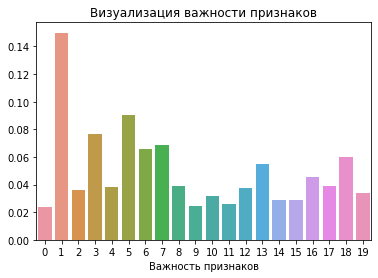

In [ ]:
import seaborn as sns
%matplotlib inline
sns.barplot(y=imp, x=imp.index)
plt.title('Визуализация важности признаков');
plt.xlabel('Важность признаков');

In [ ]:
imp_col = [1,5,3,7,6]
acc_forest = cross_val_score(LogisticRegression(), X_test[imp_col], y_test, scoring='accuracy').mean()
table['forest'] = [N, acc_forest]
acc_l1 = cross_val_score(LogisticRegression(), X_select_from_model, y_test, scoring='accuracy').mean()
table['l1'] = [5, acc_l1]

Перебор признаков:
a) SequentialFeatureSelector.
b) Повторите п. 2 на отобранных признаках.

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector 
sfs_forward = SequentialFeatureSelector( RandomForestClassifier(random_state=1), n_features_to_select=N, direction="forward")
sfs_forward.fit(df.drop(columns=['target']), df['target'])
X_seq_feature_selector = sfs_forward.transform(X_test)
# b
acc_selector = cross_val_score(LogisticRegression(), X_seq_feature_selector, y_test, scoring='accuracy').mean()
table['seq_f_selector'] = [N, acc_selector]

6.Сформулируйте выводы по проделанной работе:
a) Сделайте таблицу вида |способ выбора признаков|количество признаков|средняя точность модели|.

In [ ]:

table_df = pd.DataFrame.from_dict(data=table,orient = 'index', columns = ['количество признаков','средняя точность модели'])
table_df.sort_values(by='средняя точность модели',ascending=False)

,количество признаков,средняя точность модели
korr,5,0.95
5best,5,0.95
l1,5,0.95
forest,5,0.90
seq_f_selector,5,0.85
variance,20,0.75
no,20,0.64


**Выводы**
интересно, при большой начальной точности наблюдалось только ухудшение модели. пришлось искать такой random_state при котором начальное качество было не очень.
везде, где возможно использовала одинакове колл-во признаков = N, что б честнее сравнивать

при разных исходных данных различные методы побеждали в точности. Оставила вариант, отражающий улучшение качества любым из методов домашний работы.
